# Data Science Project - Bangalore Housing price prediction

In [1]:
# Import library functions
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
# read CSV file from either kaggle or githob
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
# Investigate data to understand more about its contents
# group by area type and see what type of data
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
# drop certain column which are not important from housing price prediction - area type, availability, society, balcony.
df2 = df1.drop(['area_type','availability', 'society', 'balcony'], axis = 'columns')             
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.shape

(13320, 5)

In [7]:
# start doing the data cleaning like deleting NONE values 
# check if there are any null values in the column
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
# null values are very small numbers compared to total data availabel, hence decided to delete
df3 = df2.dropna()
df3.shape

(13246, 5)

In [9]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
# Explore size feature 
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
# size contains various forms of house specifications like BHK OR BEDROOM. 
# 4BHK and 4 bedroom essentially same, therefore create a new column with specifying only number of bedrooms
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

<ipython-input-11-3752a73a2970>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
# explore total sqft 
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
# above output shows that there some house with total_sqft is a range, needs to convert to average of range
# In order to convert to mean, first filter those values. 
# define a function to check whether it is a float or not
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [16]:
df3[~df3['total_sqft'].apply(is_float)].head(10)


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [28]:
# Above output shows that total sqft shows both range and in another unit - sq mt and Perch etc
# Ignore sq mt and perch values in the analysis as they are very small numbers
# define a function to convert range of area into mean
def convert_range_sqft_to_sqft(x):
    tokens = x.split('-') 
    if len(tokens) == 2:
        y = float(tokens[0])+float(tokens[1])/2
        return(float(y))
    try:
        return float(x)
    except:
        return None

In [30]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_range_sqft_to_sqft)
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


# Feature Engineering

In [31]:
# copy dataframe 
df5 = df4.copy()

In [32]:
# calculate price per sq ft

df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [33]:
# find how may types of locations are in the location column 
len(df5.location.unique())

1304

It can seen above output that there are too many number of locations, which makes it difficult to deal. 
This is normally called as dimensionality curse - high dimensionality problem - can be assigned to other location where there are only one or a few locations.

In [34]:
# First remove any spaces at the end of location strings
df5.location = df5.location.apply(lambda x: x.strip())

location_stats = df5.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [37]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [39]:
# use min 10 per location as threshold value and assign as other location
len(location_stats[location_stats <= 10])

1052

In [40]:
location_stats_lessthan_10 = location_stats[location_stats <= 10]
location_stats_lessthan_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [41]:
len(df5.location.unique())

1293

In [42]:
# assign location_stats_lessthan_10 to other 
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_lessthan_10 else x)

In [46]:
len(df5.location.unique())

242

In [48]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [ ]:
# Outlier removal which are sometime errors or actual values , influence model predcition, hence it is better to remove.
# Outlier can be removed by either Stastical technique or domain knowledge (real estate)
# As you can see from data that min bedrooms are 2 and based on domain knowledge and analysing the data , it ccame to a conclusion that min 300 sq ft is required per 1 bedroom
# anything below 300 sq ft considered to be a outlier in the data and to be removed.

In [49]:
# removal of outlier in the total_sqft

df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [51]:
df5.shape

(13246, 7)

In [53]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [54]:
# remove outlier in the price per sq ft
# Understand the stastics of the price per sq ft
df6.price_per_sqft.describe()

count     12456.000000
mean       6290.299983
std        4175.619211
min         267.829813
25%        4186.725844
50%        5281.690141
75%        6904.652015
max      176470.588235
Name: price_per_sqft, dtype: float64

In [57]:
# define function remove outliers in the price per sq ft column per location wise as price depends on location
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>m-sd) & (subdf.price_per_sqft<(m+sd))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10231, 7)

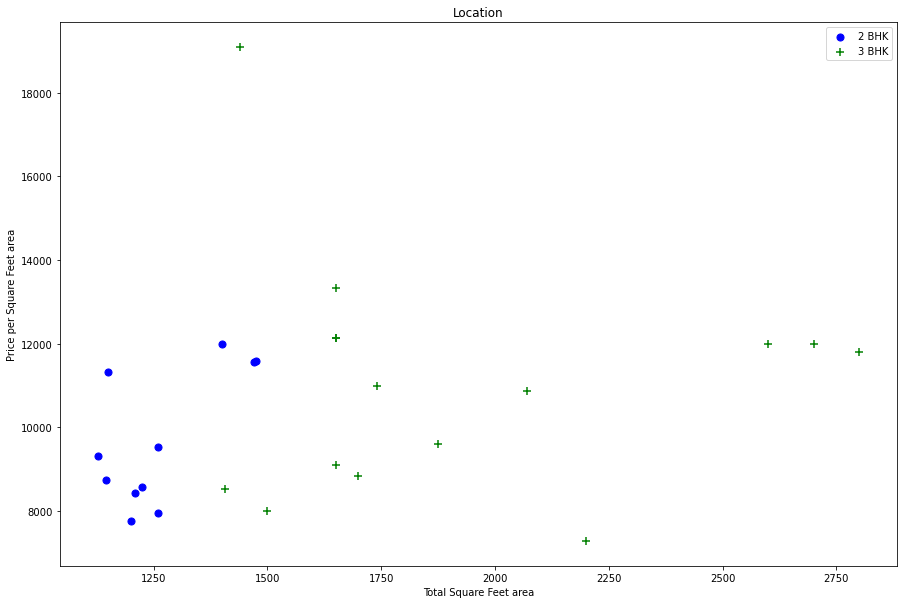

In [62]:
# Generally it is assumed that 3BHK price is higher than 2BHK , but there are some instances where for the same or nearly same total_sqft
# area price difference is very high, which needs to be removed. There might be valid reason for this difference in price but 
# in the data analysis it is going impact (as we are building model for general case), therefore it is suggested to remove these outliers in the price
# it can be visualised by plotting a scatter plot - price per sq ft .

def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk ==2)]
    bhk3 = df[(df.location == location) & (df.bhk ==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker = '+', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel("Total Square Feet area")                 
    plt.ylabel("Price in INR per Square Feet area")
    plt.title("Location")
    plt.legend()
                        
plot_scatter_chart = plot_scatter_chart(df7, "Indira Nagar")

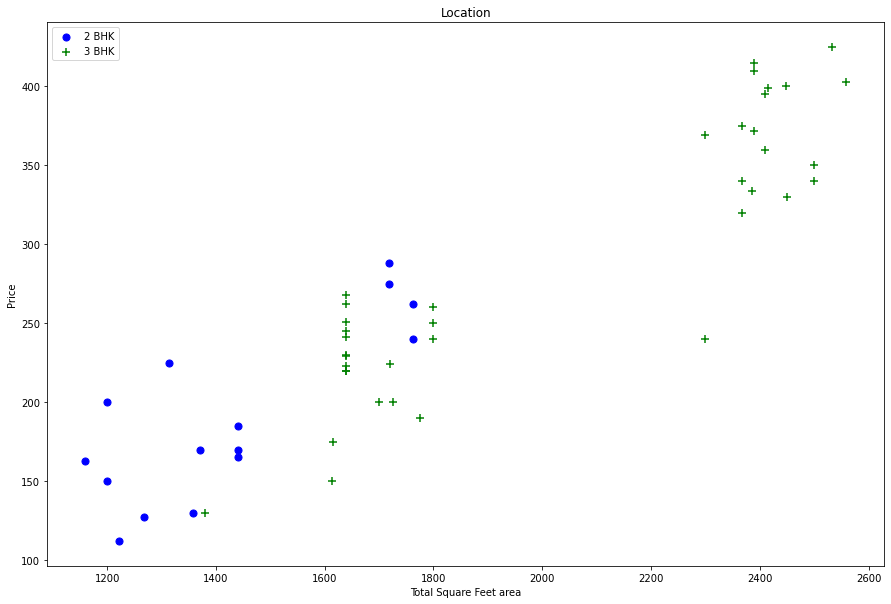

In [64]:
# plot a scatter plot - total price vs total sq ft .

def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk ==2)]
    bhk3 = df[(df.location == location) & (df.bhk ==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel("Total Square Feet area")                 
    plt.ylabel("Price in lakhs")
    plt.title("Location")
    plt.legend()
                        
plot_scatter_chart = plot_scatter_chart(df7, "Rajaji Nagar")

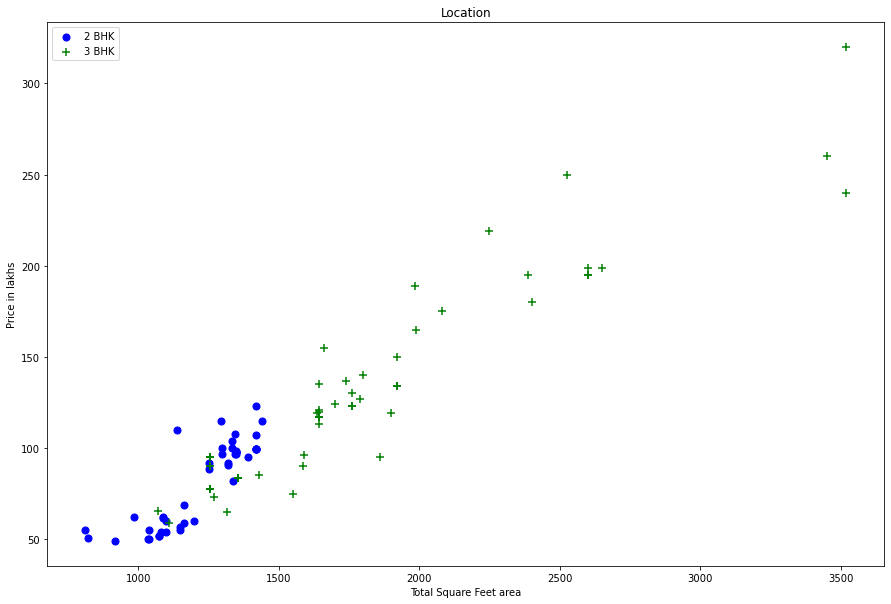

In [66]:
# plot a scatter plot - total price vs total sq ft - for Hebbal location .

def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk ==2)]
    bhk3 = df[(df.location == location) & (df.bhk ==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel("Total Square Feet area")                 
    plt.ylabel("Price in lakhs")
    plt.title("Location")
    plt.legend()
                        
plot_scatter_chart = plot_scatter_chart(df7, "Hebbal")

In [67]:
# Based on above plots , it can seen that 2 BHK houses are higher than 3bhk houses and needs to be removed. 
# We should remove properties where same location, the price (for example) 3 bedroom apartments is less than
# 2 bedroom apartments with same square ft area). For a given location, build a dictionary of stat per bhk,
# { '1': {'mean': 4000, 'std': 2000, 'count': 34} ... }
# we can remove those 2 bhk apartments whose price per sq ft  is less than mean price per sq ft of 1 bhk apartment 

In [83]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
            'mean' : np.mean(bhk_df.price_per_sqft), 
            'std'  : np.std(bhk_df.price_per_sqft),
            'count': bhk_df.shape[0]
        }
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7326, 7)

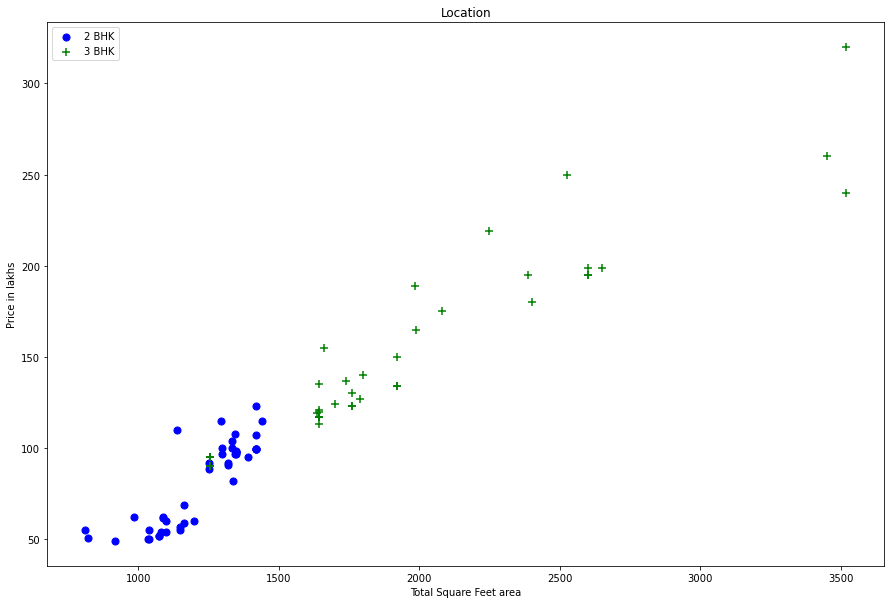

In [93]:
# Plot scatter plot after removing bhk outliers for dataframe 8
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk ==2)]
    bhk3 = df[(df.location == location) & (df.bhk ==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel("Total Square Feet area")                 
    plt.ylabel("Price in lakhs")
    plt.title("Location")
    plt.legend()
                        
plot_scatter_chart = plot_scatter_chart(df8, "Hebbal")

Text(0, 0.5, 'Count')

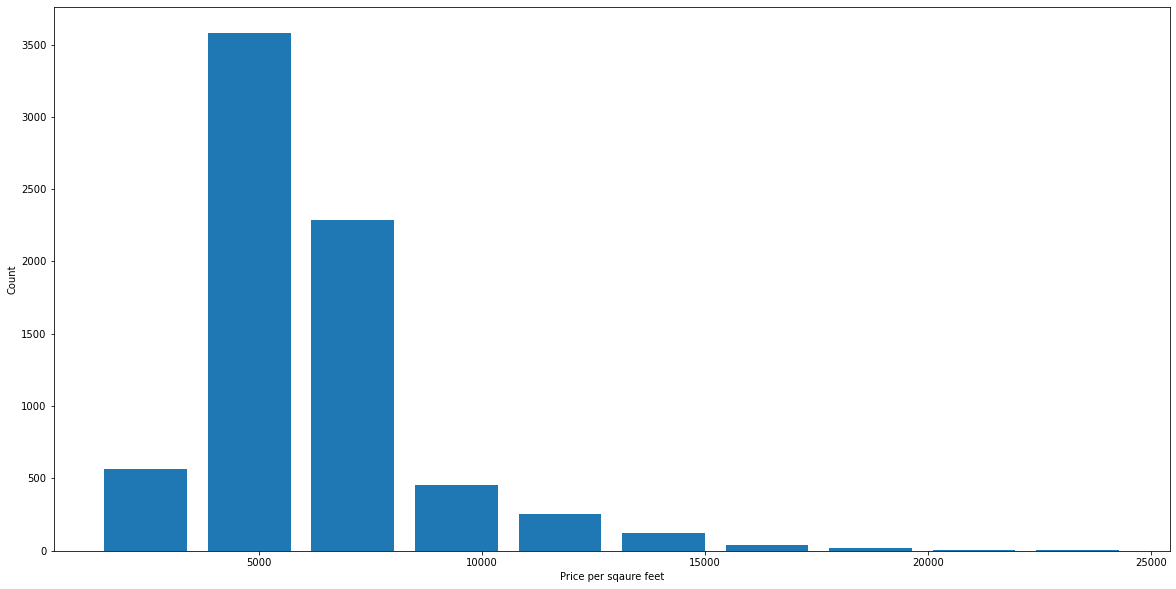

In [95]:
# plot histogram plot to check how many plots are there for price per sq ft
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price per sqaure feet")
plt.ylabel("Count")


In [96]:
# Remove Outliers in the bathroom columns if any
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

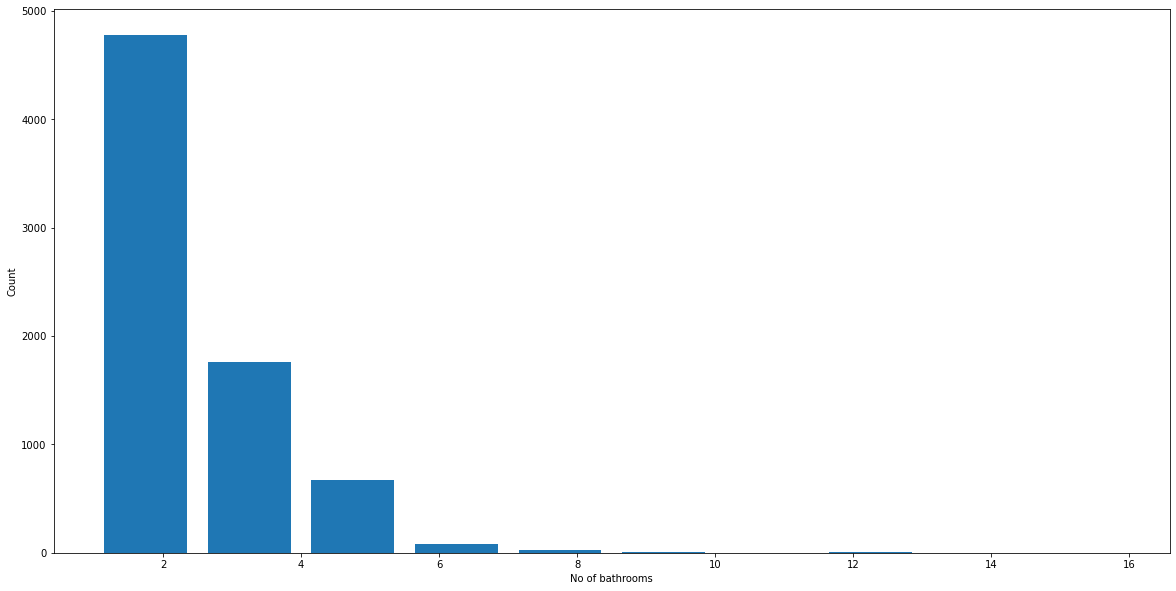

In [97]:
# plot histogram plot to check data on number of bathrooms 
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.bath, rwidth = 0.8)
plt.xlabel("No of bathrooms")
plt.ylabel("Count")

In [99]:
# set criteria of number of bathroom should not be more that number of bedrooms plus 2

# check how many properties with no of bathrooms more than no of bedrooms+2
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1625,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5234,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6705,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8401,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [100]:
# copy into new data frame with above criteria (less than bhk+2)
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7252, 7)

In [102]:
# now data set cleaned and can drop unnecessary columns in the dataframe - size, price per sqft (only used for outlier removal)
df10 = df9.drop(["size", "price_per_sqft"], axis = 'columns')
df10.shape

(7252, 5)

In [104]:
# location column has string - which should be converted into numerical data by using one hot encoding
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
# merge dummies dataframe with main dataframe 
df11 = pd.concat([df10, dummies.drop('other', axis = 'columns')], axis = 'columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
df12 = df11.drop('location', axis = 'columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
# final data set is available, split the data based on dependent variable (y = price) and independent variable (x = other than price in the dataset)
X = df12.drop('price', axis = 'columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [116]:
# Use train test split model to train /test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [117]:
# train and fit the model
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8515492485425908

In [129]:
# validate the mode using K fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

Cross_Validate = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 10)

cross_val_score(LinearRegression(), X, y, cv= Cross_Validate)

array([0.85154925, 0.85166446, 0.806055  , 0.8048414 , 0.83378804])

In [130]:
# Using GridSearchCV, with other regression models , find best regression model with parameters
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# define a function to find best model
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(), 
            'params': {
                'normalize': [True, False]
                }
        }, 
        'lasso': {
            'model': Lasso(), 
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(), 
            'params': {
                'criterion': ['mse', 'friedman_mse'], 
                'splitter': [ 'best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name, 
            'best_score': gs.best_score_, 
            'best_params': gs.best_params_
          })
    return pd.DataFrame(scores, columns= ['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.844126,{'normalize': True}
1,lasso,0.717719,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.695387,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [132]:
X.columns
np.where(X.columns == '2nd Phase Judicial Layout')[0][0]

5

In [138]:
# based on above output, it can be seen that Linear Regression is the best model for Bangalore house price prediction
# Now define function for price prediction
def price_predict(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0] # give the location of column and save as loc_index
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0: 
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]
    

In [139]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [140]:
price_predict('1st Block Jayanagar', 1000, 2, 2)

203.52564539252063

In [141]:
price_predict('1st Phase JP Nagar', 1000, 2, 2)

84.22924041844657

In [142]:
price_predict('1st Phase JP Nagar', 1000, 3, 3)

87.41872656216188

In [143]:
price_predict('Indira Nagar', 1000, 3, 5)

182.1120492307545

In [145]:
price_predict('Indira Nagar', 1000, 3, 3)

185.01066519535613

In [152]:
price_predict('Dodda Nekkundi', 3600, 7, 7)

259.38901007085593

In [146]:
# import model to pickle file
import pickle
with open('bangalore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [148]:
# export columns name into a json file 
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))